## Simulation des Verhaltens des **Blutzuckersystems** als dynamisches System

### Die Erforderlichen Bibliotheken 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Definiere die Systemparameter

   - **`G_patho`**: Der stabile Blutzuckerspiegel ohne externe Insulindosierung.
       - In diesem System handelt es sich um einen krankhaften (pathologischen) Blutzuckerspiegel, der mit der Gabe einer Insulininjektion reduziert werden soll
   - **`k`**: Der Insulinempfindlichkeitsfaktor (wie stark der Körper auf Insulin reagiert).
   - **`I_0`**: Die Insulindosis, die durch die Insulinpumpe verabreicht wird.
   - **`alpha`**: Sättigungskonstante für die Insulinwirkung.
       - Im Bereich $[0, 1]$, je höher der Wert, desto geringer ist die Wirkung

In [16]:
G_patho = 100  # Pathologischer Blutzuckerspiegel ohne Insulin in mg/dl
k = 0.5  # Insulinempfindlichkeitsfaktor (in mg/dl pro Insulineinheit)
I_0 = 2.0  # Injizierte Insulindosis in Einheiten/min
alpha = 0.1  # Sättigungskonstante

# Zeitbereich für die Simulation
t = np.linspace(0, 50, 1000)  # Simulation über 50 Minuten

### Definiere die Sättigungsfunktion

Die Funktion `saturation_function(I, alpha)` modelliert die Sättigung der Insulinwirkung. Sie stellt sicher, dass die Wirkung des Insulins bei hohen Dosen limitiert wird.

In [17]:
def saturation_function(I, alpha=alpha):
    return I / (1 + alpha * I)

### Die Sättigungsfunktion

Teste die Wirkung der Sättigungsfunktion für verschiedene Werte von $\alpha$

$$
I_{w} = \frac{I_{0}}{1 + \alpha I_{0}}
$$



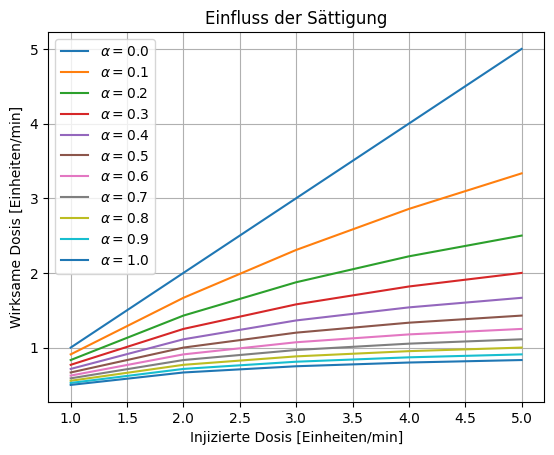

In [18]:
alph = np.linspace(0, 1, 11)  # verschiedene alpha-Werte zum testen
dosis = np.linspace(1, 5, 5) # verschiedene Dosierungswerte

for a in alph:
    dd = np.zeros_like(dosis)
    for i, d in enumerate(dosis):
        dd[i] = saturation_function(d, a)
    plt.plot(dosis, dd, label=f'$\\alpha = {a:.1f}$')
   
plt.xlabel('Injizierte Dosis [Einheiten/min]')
plt.ylabel('Wirksame Dosis [Einheiten/min]')
plt.title('Einfluss der Sättigung')
plt.legend()
plt.grid(True)
plt.show()

### Funktion zur Berechnung des Blutzuckerverlaufs mit Transportverzögerung und Sättigung

Die Funktion `blood_glucose_response(t, tau, theta, I_0)` berechnet den Blutzuckerspiegel als Funktion der Zeit. Sie berücksichtigt:
   - **Transportverzögerung $\theta$**, durch die der Blutzuckerspiegel für eine gewisse Zeit unverändert bleibt.
   - **Exponentielles Abklingen** des Blutzuckers nach der Verzögerung mit der Zeitkonstanten $\tau$.

$$
G(t) = G_{patho} - k \cdot f(I_0) \cdot \left( 1 - e^{- \frac{t - \theta}{\tau}} \right)
$$

In [19]:
# Funktion zur Berechnung des Blutzuckerverlaufs mit Transportverzögerung und Sättigung
def blood_glucose_response(t, tau, theta, I_0):
    # t: die Zeit
    # tau: die Zeitkonstante des Systems
    # theta: die Transportverzögerung
    # I_0: die injizierte Insulindosis
    
    G = np.zeros_like(t)
    G[0] = G_patho  # Setze den Startwert des Blutzuckerspiegels auf G_patho
    for i, time in enumerate(t):
        if time < theta:
            G[i] = G_patho  # Vor der Verzögerung bleibt der Blutzuckerspiegel unverändert (auf dem pathologischen Wert)
        else:
            # Berücksichtige die Sättigungsfunktion für Insulin 
            f_I = saturation_function(I_0)
            # Berechne die Blutzuckerkonzentration mit exponentiellem Abfall
            G[i] = G_patho - k * f_I * (1 - np.exp(-(time - theta) / tau))
    return G

### Parameter für die Simulationen

In [20]:
taus = [5, 10, 20]  # verschiedene Zeitkonstanten in Minuten
thetas = [0, 5, 10]  # verschiedene Transportverzögerungen in Minuten
I_0s = [1, 2, 5, 10, 15]  # verschiedene Insulindosen (zur Untersuchung der Sättigungseffekte)

### Zeitverhalten für verschiedene Zeitkonstanten

**Einfluss der Zeitkonstanten $\tau \,$**: Zeigt, wie sich unterschiedliche Werte für $\tau$ auf das Blutzuckerverhalten auswirken.

+ G_patho =100 stellt einen erhöhten Blutzuckerspiegel dar, wie er häufig bei Diabetes-Patienten vorkommt.
+ Die Insulininjektion soll den Blutzuckerspiegel G(t) von G_patho = 100 auf einen etwas niedrigeren Wert (in diesem Modell etwa 99.2) senken.
+ Die geringe Absenkung zeigt eine kontrollierte, nicht übermäßige Wirkung des Insulins, was für viele diabetische Anwendungen gewünscht ist, um Hypoglykämie zu vermeiden.
+ Die Transportverzögerung $\theta$ und Sättigung der Insulinwirkung verhindern übermäßige Schwankungen und steuern den Blutzuckerspiegel in einem eng begrenzten Bereich.
+ Falls der Zielwert stärker abgesenkt werden soll, könnten `k`, den Insulinempfindlichkeitsfaktor, oder `I_0`​, die Insulindosis, angepasst werden.

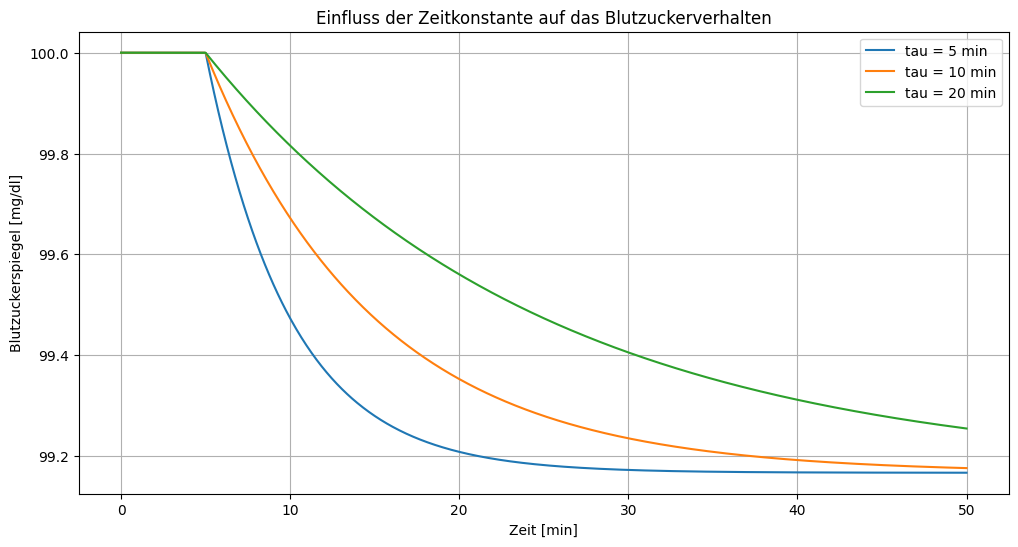

In [21]:
plt.figure(figsize=(12, 6))
for tau in taus:
    G = blood_glucose_response(t, tau, theta=5, I_0=I_0)
    plt.plot(t, G, label=f'tau = {tau} min')
plt.xlabel('Zeit [min]')
plt.ylabel('Blutzuckerspiegel [mg/dl]')
plt.title('Einfluss der Zeitkonstante auf das Blutzuckerverhalten')
plt.legend()
plt.grid(True)
plt.show()

### Zeitverhalten für verschiedene Transportverzögerungen

**Einfluss der Transportverzögerung $\theta \,$**: Zeigt die Reaktionszeit des Systems bei verschiedenen Verzögerungen.

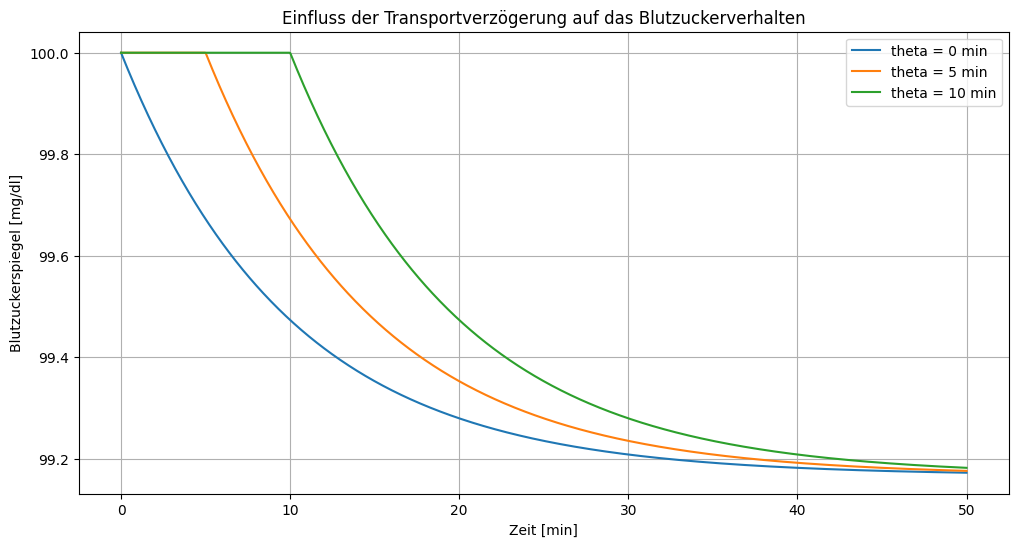

In [22]:
plt.figure(figsize=(12, 6))
for theta in thetas:
    G = blood_glucose_response(t, tau=10, theta=theta, I_0 = I_0)
    plt.plot(t, G, label=f'theta = {theta} min')
plt.xlabel('Zeit [min]')
plt.ylabel('Blutzuckerspiegel [mg/dl]')
plt.title('Einfluss der Transportverzögerung auf das Blutzuckerverhalten')
plt.legend()
plt.grid(True)
plt.show()

### Zeitverhalten für verschiedene Insulindosen (zur Untersuchung der Sättigungseffekte)

**Einfluss der Sättigungseffekte**: Simuliert verschiedene Insulindosen, um die Wirkung der Sättigungsfunktion zu analysieren.

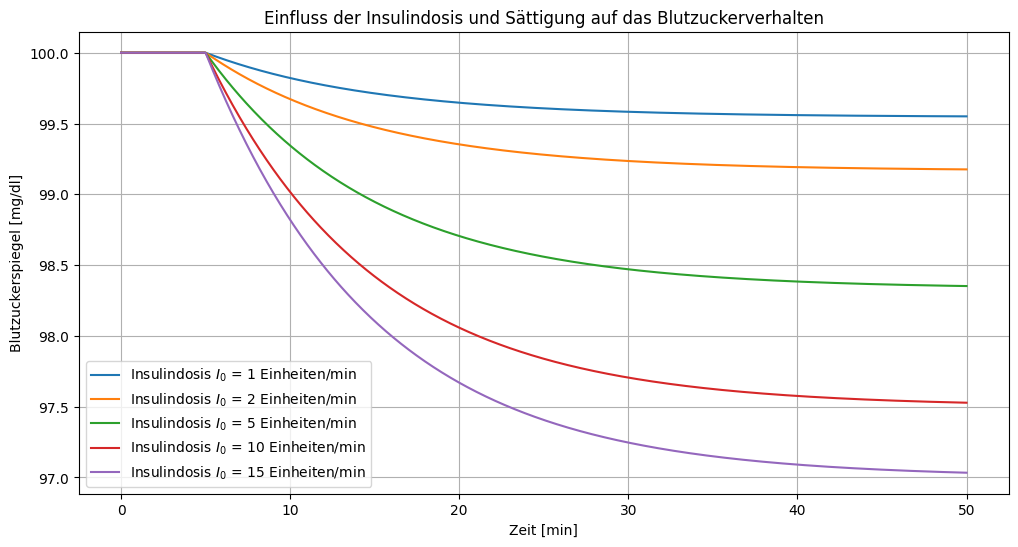

In [23]:
plt.figure(figsize=(12, 6))
for I in I_0s:
    G = blood_glucose_response(t, tau=10, theta=5, I_0=I)
    plt.plot(t, G, label=f'Insulindosis $I_0$ = {I} Einheiten/min')
plt.xlabel('Zeit [min]')
plt.ylabel('Blutzuckerspiegel [mg/dl]')
plt.title('Einfluss der Insulindosis und Sättigung auf das Blutzuckerverhalten')
plt.legend()
plt.grid(True)
plt.show()





### Ergebnis:

- **Einfluss der Zeitkonstanten**: Höhere Zeitkonstanten führen zu einer langsameren Anpassung des Blutzuckerspiegels an den stabilen Wert.
- **Einfluss der Transportverzögerung**: Eine größere Verzögerung führt dazu, dass der Blutzuckerspiegel erst nach einer bestimmten Zeit auf die Insulinzufuhr reagiert.
- **Einfluss der Sättigungseffekte**: Bei hohen Insulindosen wird der Effekt durch die Sättigungslimitierung reduziert, was im Plot sichtbar wird, wenn sich die Kurven annähern.

Diese Simulationen bieten eine detaillierte Analyse der dynamischen Effekte des Systems und können durch Anpassung der Parameter weiter verfeinert werden.